<a href="https://colab.research.google.com/github/SohelRaja/UndErNsembled/blob/master/Classification-Phase/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Classifier On Balanced Dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
from sklearn.ensemble import BaggingClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
from sklearn.svm import SVC

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [3]:
datasetUrl = "https://raw.githubusercontent.com/SohelRaja/UndErNsembled/master/Datasets/balanced_dataset_colon.csv"
colon = pd.read_csv(datasetUrl)
colon.head(5)

,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.7488,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.67380,2249.8188,2150.1218,3350.5024,1563.98930,1903.5825,1568.1113,1368.8175,2648.2676,1073.4100,1207.41630,1201.7687,1733.8239,621.65000,1381.4825,719.45250,967.3576,967.3576,...,40.36000,22.07125,6.37000,17.33375,45.464287,105.94625,28.90500,75.84375,42.00125,123.20875,42.02250,19.664286,49.37738,62.65250,52.741670,55.26750,30.60375,57.94250,149.38500,24.352633,29.42375,49.856945,80.67375,50.12125,71.184210,29.364286,52.59125,43.63625,56.07250,126.46429,76.60375,161.35000,61.70125,54.56375,223.35953,73.09875,57.59875,7.48875,31.81250,0
1,14368.2760,3651.9910,3302.9275,5738.4860,5115.9130,4890.7856,5008.3286,5643.7812,6013.9510,3837.7678,5468.1562,4009.4768,3601.6875,6879.5550,6581.2560,6469.8080,6988.9450,4277.1987,2821.5962,3470.4050,6012.3000,8254.4510,8120.46500,3694.6290,4202.4624,11454.7100,2714.63450,6801.9385,2321.0562,4907.0864,6563.6187,1994.4462,3666.92750,1996.3838,1404.3712,4449.01860,4555.5312,1442.28000,3773.4960,3773.4960,...,145.72626,921.68130,96.21250,196.02875,122.570240,260.27374,197.52126,200.46625,104.77250,472.09375,277.67374,80.764280,293.15000,122.08625,142.969440,221.96625,483.85376,98.92000,432.57376,44.421055,57.64375,189.606930,101.55875,135.40750,168.543430,192.569640,381.46250,170.31625,100.00375,246.32619,185.83125,720.59375,154.14750,278.57500,303.00000,289.66626,333.59250,97.04625,112.43250,0
2,5100.5360,3343.3206,2925.6700,2914.1946,1481.2227,3697.9463,2080.2750,1638.0450,3763.1375,3530.0690,2530.7812,1287.1309,1569.9888,1593.4575,1925.3524,2389.9917,2823.5000,2238.2275,1700.2225,1564.8262,2825.6438,2619.1462,2374.89620,3848.0300,1212.9750,3247.4560,804.64764,1730.5325,1801.9587,2032.9575,1745.7225,1879.3225,2278.00000,1659.0000,736.6700,2132.25400,1271.8450,1394.87130,2617.1426,2617.1426,...,78.79250,123.30375,42.19625,86.36375,22.157143,224.61874,56.71500,60.26875,25.21250,346.04126,292.11250,12.525000,151.03810,37.99750,44.797222,52.52875,85.69125,66.91375,221.34375,86.106580,32.07875,85.363890,19.01250,15.45625,24.555264,27.973213,380.22000,50.82500,403.64250,79.76547,55.73750,178.39500,71.55125,79.08500,95.10833,104.88875,93.17750,49.62750,50.77625,0
3,2510.3250,1960.6545,1566.3150,3072.8162,1810.2048,1673.5643,1290.4211,2465.8462,1675.5438,1312.8083,2289.0350,2162.2866,2070.0774,3466.7913,2137.4180,2716.3792,1497.1588,1586.2438,962.0100,1214.7675,904.7225,3970.4226,906.59625,1313.0588,1950.3906,1788.1464,1254.51550,1639.1475,819.1887,1454.7625,1227.4187,916.7125,576.78375,745.3400,994.6125,540.46875,1236.0762,422.65625,1374.1554,1374.1554,...,42.30250,26.41500,18.27000,16.17875,36.127380,213.55125,37.78250,29.52500,27.13875,74.56125,34.43875,16.604761,111.28095,61.57250,41.211110,39.77750,28.01250,23.72375,87.18000,6.088158,26.13000,18.765278,50.26000,24.35000,15.419737,13.553571,84.20625,47.47875,73.50500,122.53333,47.53500,147.23625,28.31000,33.19500,91.85000,5.87875,36.29750,9.81500,21.88375,1
4,9112.3720,6824.4863,5982.8460,3147.0430,4847.3080,11222.6820,6333.4727,4299.5024,4644.4424,5888.5464,6527.6500,3105.4250,2482.5662,3450.6100,5076.6640,4989.6875,6692.5986,3717.1100,3561.9775,3590.9976,5292.1360,4991.0100,4514.93850,3117.7375,3144.9407,9123.4600,1915.19400,4192.3726,6196.5015,1917.3475,5432.

### Data Analysis

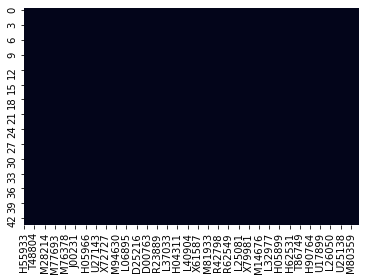

In [4]:
sns.heatmap(colon.isnull(),cbar=False)

In [5]:
colon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), int64(1)
memory usage: 688.0 KB


### Creating Two Different Dataframes

In [6]:
colon['Class'].value_counts()

1    22
0    22
Name: Class, dtype: int64

In [7]:
X = colon.drop(['Class'],axis=1)
y = colon['Class']

### Taking Dummy Values

In [8]:
Y = pd.get_dummies(y, drop_first=True)
Y.head()

,1
0,0
1,0
2,0
3,1
4,0


### Spliting of Training and testing dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 2000) (14, 2000) (30, 1) (14, 1)


### KNN Classification

In [38]:
clf_knn = KNeighborsClassifier()

hyperparameters_knn = {
    'leaf_size': list(range(1,25)),
    'n_neighbors': list(range(1,16))
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gs_knn = GridSearchCV(clf_knn, param_grid=hyperparameters_knn, cv=cv,n_jobs=-1,verbose=2)
gs_knn_result = gs_knn.fit(X_train, y_train)

print("Best: %f using %s" % (gs_knn_result.best_score_, gs_knn_result.best_params_))

Fitting 30 folds for each of 360 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 5084 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  1.2min


Best: 0.922222 using {'leaf_size': 1, 'n_neighbors': 1}


[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:  1.6min finished


In [44]:
df_knn_result = pd.DataFrame(gs_knn.cv_results_)
df_knn_result[['param_leaf_size','param_n_neighbors','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score').head(15)

,param_leaf_size,param_n_neighbors,params,mean_test_score,std_test_score,rank_test_score
0,1,1,"{'leaf_size': 1, 'n_neighbors': 1}",0.922222,0.140984,1
240,17,1,"{'leaf_size': 17, 'n_neighbors': 1}",0.922222,0.140984,1
225,16,1,"{'leaf_size': 16, 'n_neighbors': 1}",0.922222,0.140984,1
75,6,1,"{'leaf_size': 6, 'n_neighbors': 1}",0.922222,0.140984,1
45,4,1,"{'leaf_size': 4, 'n_neighbors': 1}",0.922222,0.140984,1
210,15,1,"{'leaf_size': 15, 'n_neighbors': 1}",0.922222,0.140984,1
90,7,1,"{'leaf_size': 7, 'n_neighbors': 1}",0.922222,0.140984,1
300,21,1,"{'leaf_size': 21, 'n_neighbors': 1}",0.922222,0.140984,1
255,18,1,"{'leaf_size': 18, 'n_neighbors': 1}",0.922222,0.140984,1
195,14,1,"{'leaf_size': 14, 'n_neighbors': 1}",0.922222,0.140984,1


In [45]:
best_gs_knn = gs_knn.best_estimator_
best_gs_knn

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
best_gs_knn.fit(X_train, y_train)
best_gs_knn_y_pred = best_gs_knn.predict(X_test)
best_gs_knn_y_pred_train = best_gs_knn.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_knn_y_pred_train), accuracy_score(y_test, best_gs_knn_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.714286


In [48]:
n = 30
l_knn = []
clf_base = best_gs_knn
for i in range(1,n):
  bg = BaggingClassifier(base_estimator=clf_base,max_samples=0.7,max_features=0.7,n_estimators=i)
  bg.fit(X_train,y_train)
  l_knn.append(bg.score(X_test,y_test))

In [49]:
print("accuracy = " + str(max(l_knn))+ " with estimator "+ str(1+l_knn.index(max(l_knn))))

accuracy = 0.7142857142857143 with estimator 3


### Logistic Regression

In [51]:
clf_logreg = LogisticRegression()

hyperparameters_logreg = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet']
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

gs_logreg = GridSearchCV(estimator=clf_logreg, param_grid=hyperparameters_logreg, n_jobs=-1, cv=cv, scoring='accuracy',verbose=2)
gs_logreg_result = gs_logreg.fit(X_train, y_train)

print("Best: %f using %s" % (gs_logreg_result.best_score_, gs_logreg_result.best_params_))

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    3.5s


Best: 0.900000 using {'C': 100, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.6s finished


In [52]:
df_logreg_result = pd.DataFrame(gs_logreg.cv_results_)
df_logreg_result[['param_C','param_penalty','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_C,param_penalty,params,mean_test_score,std_test_score,rank_test_score
1,100,l2,"{'C': 100, 'penalty': 'l2'}",0.9,0.152753,1
4,10,l2,"{'C': 10, 'penalty': 'l2'}",0.9,0.152753,1
7,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.9,0.152753,1
10,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.9,0.152753,1
13,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.9,0.152753,1
0,100,l1,"{'C': 100, 'penalty': 'l1'}",NaN,NaN,6
2,100,elasticnet,"{'C': 100, 'penalty': 'elasticnet'}",NaN,NaN,7
3,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,8
5,10,elasticnet,"{'C': 10, 'penalty': 'elasticnet'}",NaN,NaN,9
6,1,l1,"{'C': 1.0, 'penalty': 'l1'}",NaN,NaN,10


In [53]:
best_gs_logreg = gs_logreg.best_estimator_
best_gs_logreg

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
best_gs_logreg.fit(X_train, y_train)
best_gs_logreg_y_pred = best_gs_logreg.predict(X_test)
best_gs_logreg_y_pred_train = best_gs_logreg.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_logreg_y_pred_train), accuracy_score(y_test, best_gs_logreg_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.857143


#### Bagging For Logistic Regression

In [55]:
n = 30
l_lr = []
clf_base = best_gs_logreg
for i in range(1,n):
  bg_lr = BaggingClassifier(base_estimator=clf_base,max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_lr.fit(X_train,y_train)
  l_lr.append(bg_lr.score(X_test,y_test))

In [56]:
print("accuracy = " + str(max(l_lr))+ " with estimator "+ str(1+l_lr.index(max(l_lr))))

accuracy = 0.8571428571428571 with estimator 1


#### Adaboost for Logistic Regression

In [58]:
abc_logreg = AdaBoostClassifier(base_estimator=best_gs_logreg)
abc_logreg.fit(X_train,y_train)
abc_logreg_y_pred = abc_logreg.predict(X_test)
abc_logreg_y_pred_train = abc_logreg.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_logreg_y_pred_train), accuracy_score(y_test, abc_logreg_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.857143


### Decision Tree

In [60]:
hyper_parameters_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,10)),
    'min_samples_split': list(range(2,10)),
    'min_samples_leaf': list(range(1,10,2))
}

clf_dt = DecisionTreeClassifier()

gs_dt = GridSearchCV(clf_dt, param_grid=hyper_parameters_dt, verbose=2)
gs_dt.fit(X_train,y_train)
print("Best: %f using %s" % (gs_dt.best_score_, gs_dt.best_params_))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, total=   0.0s
[CV] criterion=gini, max_depth=6, 

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   55.7s finished


In [61]:
df_dt_result = pd.DataFrame(gs_dt.cv_results_)
df_dt_result[['param_criterion','param_max_depth','param_min_samples_leaf','param_min_samples_split','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score').head(15)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,mean_test_score,std_test_score,rank_test_score
160,gini,5,1,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.866667,0.124722,1
414,entropy,2,3,8,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.866667,0.124722,2
291,gini,8,3,5,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.833333,0.182574,3
330,gini,9,3,4,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.833333,0.105409,3
404,entropy,2,1,6,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.833333,0.105409,3
322,gini,9,1,4,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.833333,0.105409,3
247,gini,7,1,9,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.833333,0.105409,3
209,gini,6,3,3,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.833333,0.105409,3
84,gini,3,1,6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.833333,0.105409,3
482,entropy,4,1,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.800000,0.124722,10


In [62]:
best_gs_dt = gs_dt.best_estimator_
best_gs_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
best_gs_dt.fit(X_train, y_train)
best_gs_dt_y_pred = best_gs_dt.predict(X_test)
best_gs_dt_y_pred_train = best_gs_dt.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_dt_y_pred_train), accuracy_score(y_test, best_gs_dt_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.785714


#### Adaboost for Decision Tree

In [64]:
abc_dt = AdaBoostClassifier(base_estimator=best_gs_dt)
abc_dt.fit(X_train,y_train)
abc_dt_y_pred = abc_dt.predict(X_test)
abc_dt_y_pred_train = abc_dt.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_dt_y_pred_train), accuracy_score(y_test, abc_dt_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.714286


### SVM

In [71]:
hyper_parameters = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['linear', 'rbf']
        }

gs_svm = GridSearchCV(estimator=SVC(), param_grid=hyper_parameters, verbose=True)

gs_svm.fit(X_train,y_train)
print("Best: %f using %s" % (gs_svm.best_score_, gs_svm.best_params_))
print(gs_svm.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.866667 using {'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   11.1s finished


In [72]:
df_svm_result = pd.DataFrame(gs_svm.cv_results_)
df_svm_result[['param_C','param_gamma','param_kernel','params','mean_test_score','std_test_score','rank_test_score']].sort_values('rank_test_score')

,param_C,param_gamma,param_kernel,params,mean_test_score,std_test_score,rank_test_score
0,0.05,0.1,linear,"{'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}",0.866667,0.124722,1
110,0.4,0.6,linear,"{'C': 0.4, 'gamma': 0.6, 'kernel': 'linear'}",0.866667,0.124722,1
108,0.4,0.5,linear,"{'C': 0.4, 'gamma': 0.5, 'kernel': 'linear'}",0.866667,0.124722,1
184,0.8,0.3,linear,"{'C': 0.8, 'gamma': 0.3, 'kernel': 'linear'}",0.866667,0.124722,1
106,0.4,0.4,linear,"{'C': 0.4, 'gamma': 0.4, 'kernel': 'linear'}",0.866667,0.124722,1
...,...,...,...,...,...,...,...
109,0.4,0.5,rbf,"{'C': 0.4, 'gamma': 0.5, 'kernel': 'rbf'}",0.500000,0.000000,121
111,0.4,0.6,rbf,"{'C': 0.4, 'gamma': 0.6, 'kernel': 'rbf'}",0.500000,0.000000,121
113,0.4,0.7,rbf,"{'C': 0.4, 'gamma': 0.7, 'kernel': 'rbf'}",0.500000,0.000000,121
159,0.6,1,rbf,"{'C': 0.6, 'gamma': 1.0, 'kernel': 'rbf'}",0.500000,0.000000,121


In [73]:
best_gs_svm = gs_svm.best_estimator_
best_gs_svm

SVC(C=0.05, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
best_gs_svm.fit(X_train, y_train)
best_gs_svm_y_pred = best_gs_svm.predict(X_test)
best_gs_svm_y_pred_train = best_gs_svm.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, best_gs_svm_y_pred_train), accuracy_score(y_test, best_gs_svm_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.714286


#### Bagging For SVM

In [75]:
n = 30
l_svm = []

for i in range(1,n):
  bg_svm= BaggingClassifier(base_estimator=best_gs_svm,max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_svm.fit(X_train,y_train)
  l_svm.append(bg_svm.score(X_test,y_test))

In [76]:
print("accuracy = " + str(max(l_svm))+ " with estimator "+ str(1+l_svm.index(max(l_svm))))

accuracy = 0.9285714285714286 with estimator 28


#### Adaboosting For SVM

In [77]:
abc_svm = AdaBoostClassifier(base_estimator=best_gs_svm, algorithm='SAMME')
abc_svm.fit(X_train,y_train)
abc_svm_y_pred = abc_svm.predict(X_test)
abc_svm_y_pred_train = abc_svm.predict(X_train)
print("Training accuracy: %f and Testing accuracy: %f" % (accuracy_score(y_train, abc_svm_y_pred_train), accuracy_score(y_test, abc_svm_y_pred)))

Training accuracy: 1.000000 and Testing accuracy: 0.714286


### Random Forest

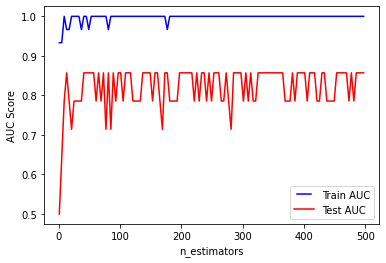

In [79]:
n_estimators = range(1,500,4)
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

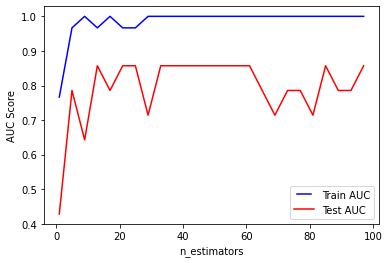

In [80]:
n_estimators = range(1,100,4)
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [81]:
for i in range(1,41):
  rf = RandomForestClassifier(n_estimators = i, criterion='gini', min_samples_leaf=4, min_samples_split=8, max_depth=2)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
  print('Accuracy(Random Forest): ',rf_accuracy,'%', ' for n_estimators: ',i)

Accuracy(Random Forest):  64.29 %  for n_estimators:  1
Accuracy(Random Forest):  71.43 %  for n_estimators:  2
Accuracy(Random Forest):  57.14 %  for n_estimators:  3
Accuracy(Random Forest):  85.71 %  for n_estimators:  4
Accuracy(Random Forest):  92.86 %  for n_estimators:  5
Accuracy(Random Forest):  85.71 %  for n_estimators:  6
Accuracy(Random Forest):  42.86 %  for n_estimators:  7
Accuracy(Random Forest):  64.29 %  for n_estimators:  8
Accuracy(Random Forest):  71.43 %  for n_estimators:  9
Accuracy(Random Forest):  78.57 %  for n_estimators:  10
Accuracy(Random Forest):  64.29 %  for n_estimators:  11
Accuracy(Random Forest):  71.43 %  for n_estimators:  12
Accuracy(Random Forest):  78.57 %  for n_estimators:  13
Accuracy(Random Forest):  85.71 %  for n_estimators:  14
Accuracy(Random Forest):  85.71 %  for n_estimators:  15
Accuracy(Random Forest):  71.43 %  for n_estimators:  16
Accuracy(Random Forest):  57.14 %  for n_estimators:  17
Accuracy(Random Forest):  85.71 %  for n

### Gradient Boosting

In [84]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.714
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



#### Tune Learning rate and n_estimator

In [85]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.07346954, 0.1442584 , 0.24390607, 0.35987425, 0.46865354,
         0.5813695 , 0.69572148, 0.79628177, 0.08471103, 0.1503356 ,
         0.25881948, 0.37093358, 0.47382092, 0.59285417, 0.69781256,
         0.81569386, 0.09509621, 0.17844677, 0.29654555, 0.39788599,
         0.50519934, 0.61396036, 0.72765388, 0.835321  , 0.09636178,
         0.2304575 , 0.4327148 , 0.6482954 , 0.75231152, 0.87338052,
         0.99335909, 1.09892864, 0.0960598 , 0.22362056, 0.44442306,
         0.66208081, 0.8822587 , 1.09330997, 1.29605126, 1.41778955,
         0.09392447, 0.22755299, 0.44362011, 0.64778852, 0.88021736,
         1.07927933, 1.30534749, 1.44898911]),
  'mean_score_time': array([0.00501404, 0.00493875, 0.00495563, 0.0053061 , 0.00535927,
         0.00548801, 0.00551028, 0.00554152, 0.00503039, 0.00502639,
         0.00498323, 0.00523548, 0.00524478, 0.0054626 , 0.00558238,
         0.00563321, 0.00478892, 0.00479012, 0.00506434, 0.0051856 ,
         0.00555868,

#### Tune max_depth

In [86]:
p_test_max_depth = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test_max_depth, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.99738455, 1.01722398, 0.96493111, 0.97742805, 0.97387142,
         0.96642928]),
  'mean_score_time': array([0.00819035, 0.00586834, 0.00575948, 0.00577183, 0.0057826 ,
         0.0052999 ]),
  'mean_test_score': array([0.86666667, 0.86666667, 0.86666667, 0.86666667, 0.86666667,
         0.86666667]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'rank_test_score': array([1, 1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
         0.83333333]),
  'split1_test_score': array([0.83333333, 0.83333333, 0.83333333, 0.83333333, 0.83333333,
         0.83333333]),
  'split2_test_score': array([1., 1., 1., 1., 1., 1.]),
  'split3_te

#### Tune Subsample

In [87]:
p_test_sub= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test_sub, scoring='accuracy',n_jobs=-1,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.87782798, 0.87032437, 0.87094903, 0.86110649, 0.86956935,
         0.86496682, 0.59203591]),
  'mean_score_time': array([0.00553112, 0.00537367, 0.0052773 , 0.00547943, 0.00540328,
         0.00540628, 0.00631971]),
  'mean_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'rank_test_score': array([1, 1, 1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
  'split3_test_score': array([0.5, 0.5, 0.5, 0.5, 0

#### After Tuning

In [88]:
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=750,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=0.7,max_features='sqrt', random_state=10)
gb_model.fit(X_train,y_train)
predictors = list(X_train)
print('Accuracy of the GBM on test set: {:.2f}'.format(gb_model.score(X_test, y_test)))
pred = gb_model.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.71
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14
   macro avg       0.71      0.71      0.71        14
weighted avg       0.71      0.71      0.71        14



### Stacking

In [89]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [105]:
def stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	# level0.append(('cart', DecisionTreeClassifier()))
	# level0.append(('svm', SVC()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [106]:
def getmodels():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	# models['cart'] = DecisionTreeClassifier()
	# models['svm'] = SVC()
	models['stacking'] = stacking()
	return models

In [107]:
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores

>lr 0.880 (0.148)
>knn 0.822 (0.185)
>stacking 0.880 (0.148)


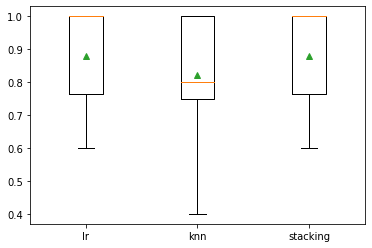

In [108]:
models = getmodels()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()